In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [76]:
df = pd.read_csv('../1205월별데이터편집/data/월별데이터합침2015-2022.csv')

In [77]:
df.columns

Index(['STD_YYYYMM', 'SIDO', '비염환자수', '아토피환자수', '천식환자수', '평균기온', '평균상대습도',
       '평균증기압', '평균최고기온', '평균최저기온', '평균풍속', 'AVG_PM10', 'PM10_BAD',
       'PM10_80BAD', 'AVG_PM2.5', 'PM2_BAD', 'PM2_35BAD', 'AVG_아황산',
       '아황산_0.05BAD', '아황산_BAD', 'AVG_이산화', '이산화_0.06BAD', '이산화_0.03BAD',
       '이산화_BAD', 'AVG_일산화', '일산화_9BAD', '일산화_BAD', '차량수', 'AVG_구리', '구리_BAD',
       'AVG_납', '납_0.5BAD', '납_BAD', 'AVG_니켈', '니켈_BAD', 'AVG_망간', '망간_BAD',
       'AVG_비소', '비소_BAD', 'AVG_철', '철_BAD', 'AVG_카드뮴', '카드뮴_BAD', 'AVG_크롬',
       '크롬_BAD'],
      dtype='object')

In [88]:
result_df =df.loc[:, ~df.columns.str.contains('BAD')]
# BAD라는 문자를 포함하고 있는 콜롬 필터링
result_df1 =df.loc[:, ~df.columns.str.contains('BAD')]
# BAD라는 문자를 포함하고 있는 콜롬 필터링
result_df1 =df.loc[:, ~df.columns.str.contains('STD')]
# STD라는 문자를 포함하고 있는 콜롬 필터링
result_df2 = df.loc[:, ~(df.columns.str.contains('AVG') | df.columns.str.contains('평균'))]
# 'AVG' 또는 '평균' 문자를 포함하는 컬럼을 제외
result_df3 =df.loc[:, ~df.columns.str.contains('BAD')]
# BAD라는 문자를 포함하고 있는 콜롬 필터링



In [89]:
result_df3.columns

Index(['STD_YYYYMM', 'SIDO', '비염환자수', '아토피환자수', '천식환자수', '평균기온', '평균상대습도',
       '평균증기압', '평균최고기온', '평균최저기온', '평균풍속', 'AVG_PM10', 'AVG_PM2.5', 'AVG_아황산',
       'AVG_이산화', 'AVG_일산화', '차량수', 'AVG_구리', 'AVG_납', 'AVG_니켈', 'AVG_망간',
       'AVG_비소', 'AVG_철', 'AVG_카드뮴', 'AVG_크롬'],
      dtype='object')

In [79]:
result_df.columns

Index(['STD_YYYYMM', 'SIDO', '비염환자수', '아토피환자수', '천식환자수', '평균기온', '평균상대습도',
       '평균증기압', '평균최고기온', '평균최저기온', '평균풍속', 'AVG_PM10', 'AVG_PM2.5', 'AVG_아황산',
       'AVG_이산화', 'AVG_일산화', '차량수', 'AVG_구리', 'AVG_납', 'AVG_니켈', 'AVG_망간',
       'AVG_비소', 'AVG_철', 'AVG_카드뮴', 'AVG_크롬'],
      dtype='object')

In [80]:
result_df2.columns

Index(['STD_YYYYMM', 'SIDO', '비염환자수', '아토피환자수', '천식환자수', 'PM10_BAD',
       'PM10_80BAD', 'PM2_BAD', 'PM2_35BAD', '아황산_0.05BAD', '아황산_BAD',
       '이산화_0.06BAD', '이산화_0.03BAD', '이산화_BAD', '일산화_9BAD', '일산화_BAD', '차량수',
       '구리_BAD', '납_0.5BAD', '납_BAD', '니켈_BAD', '망간_BAD', '비소_BAD', '철_BAD',
       '카드뮴_BAD', '크롬_BAD'],
      dtype='object')

C:\Users\th\AppData\Local\Temp\ipykernel_29964\2171627312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Year'] = result_df['STD_YYYYMM'].astype(str).str[:4].astype(int)
C:\Users\th\AppData\Local\Temp\ipykernel_29964\2171627312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Month'] = result_df['STD_YYYYMM'].astype(str).str[4:].astype(int)


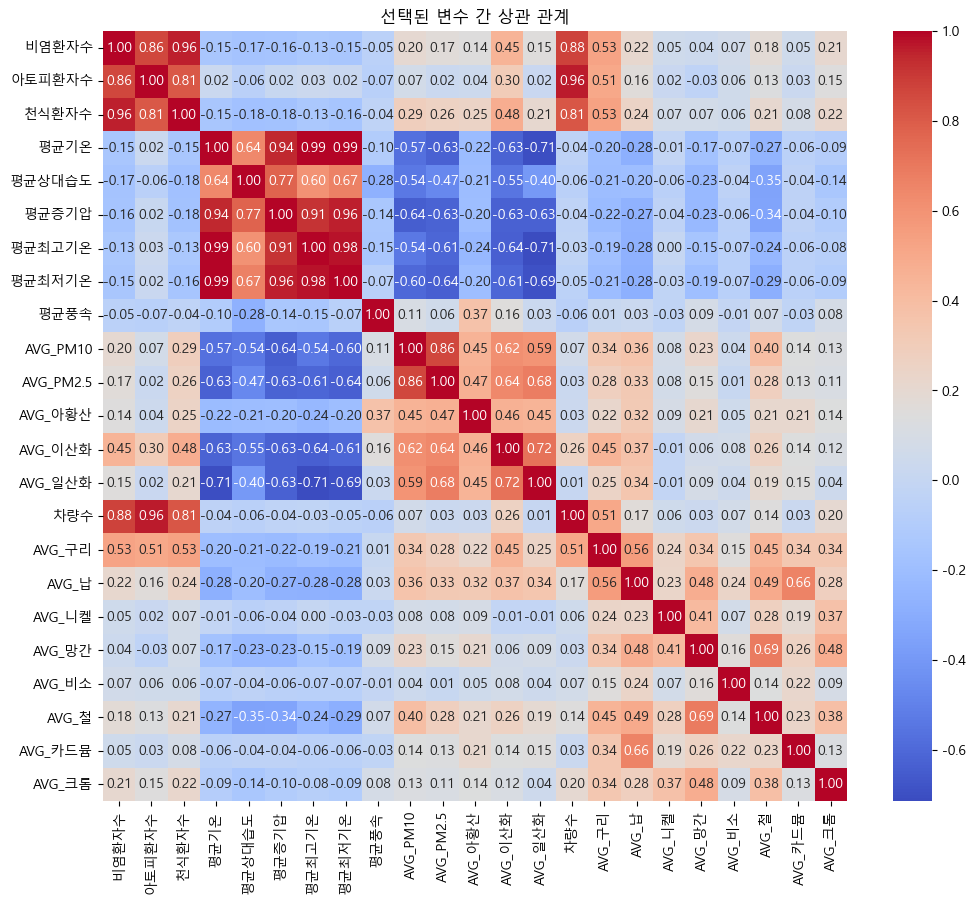

In [81]:
# 날짜 데이터 변환
result_df['Year'] = result_df['STD_YYYYMM'].astype(str).str[:4].astype(int)
result_df['Month'] = result_df['STD_YYYYMM'].astype(str).str[4:].astype(int)

# 시도 원-핫 인코딩
sido_dummies = pd.get_dummies(result_df['SIDO'], prefix='SIDO')
result_df = pd.concat([result_df, sido_dummies], axis=1)

# 필요한 경우, 원래 'STD_YYYYMM' 및 'SIDO' 컬럼 제거
result_df.drop(['STD_YYYYMM', 'SIDO'], axis=1, inplace=True)

# 전체 상관관계 행렬 계산
full_corr_matrix = result_df.corr()

# 시각화용 상관관계 행렬 생성 (시간 및 도시 컬럼 제외)
visualization_columns = [col for col in result_df.columns if 'Year' not in col and 'Month' not in col and not col.startswith('SIDO')]
vis_corr_matrix = result_df[visualization_columns].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(vis_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('선택된 변수 간 상관 관계')
plt.show()

C:\Users\th\AppData\Local\Temp\ipykernel_29964\1554928457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = result_df1.corrwith(result_df1['차량수']).sort_values(ascending=False)


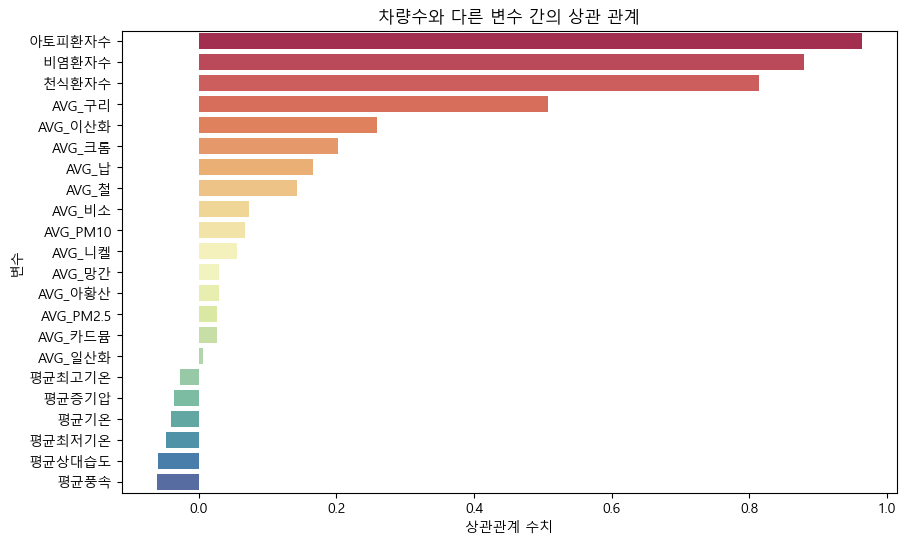

In [82]:
# 특정 변수와 다른 모든 변수 간의 상관관계 계산
target_corr = result_df1.corrwith(result_df1['차량수']).sort_values(ascending=False)

# '차량수' 변수 제거
target_corr = target_corr.drop(labels=['차량수'])

# 상관관계 시각화
plt.figure(figsize=(10, 6))

# 상관계수를 막대 그래프로 표시합니다.
corr_result_df1 = target_corr.reset_index()
corr_result_df1.columns = ['변수', '상관관계 수치']
sns.barplot(x='상관관계 수치', y='변수', data=corr_result_df1, palette='Spectral')

plt.title('차량수와 다른 변수 간의 상관 관계')
plt.show()


C:\Users\th\AppData\Local\Temp\ipykernel_29964\1941660999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = result_df1.corrwith(result_df1['아토피환자수']).sort_values(ascending=False)


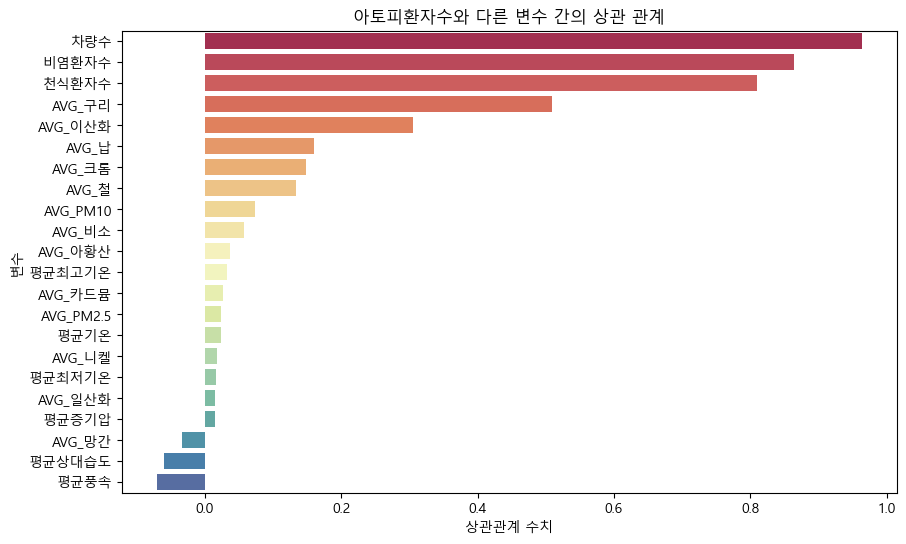

In [83]:
# 특정 변수와 다른 모든 변수 간의 상관관계 계산
target_corr = result_df1.corrwith(result_df1['아토피환자수']).sort_values(ascending=False)

# '아토피환자수' 변수 제거
target_corr = target_corr.drop(labels=['아토피환자수'])

# 상관관계 시각화
plt.figure(figsize=(10, 6))

# 상관계수를 막대 그래프로 표시합니다.
corr_result_df1 = target_corr.reset_index()
corr_result_df1.columns = ['변수', '상관관계 수치']
sns.barplot(x='상관관계 수치', y='변수', data=corr_result_df1, palette='Spectral')

plt.title('아토피환자수와 다른 변수 간의 상관 관계')
plt.show()


In [84]:
result_df2['SIDO'].value_counts()

서울특별시      96
부산광역시      96
대구광역시      96
인천광역시      96
광주광역시      96
대전광역시      96
울산광역시      96
세종특별자치시    96
경기도        96
충청북도       96
충청남도       96
전라북도       96
전라남도       96
경상북도       96
경상남도       96
Name: SIDO, dtype: int64

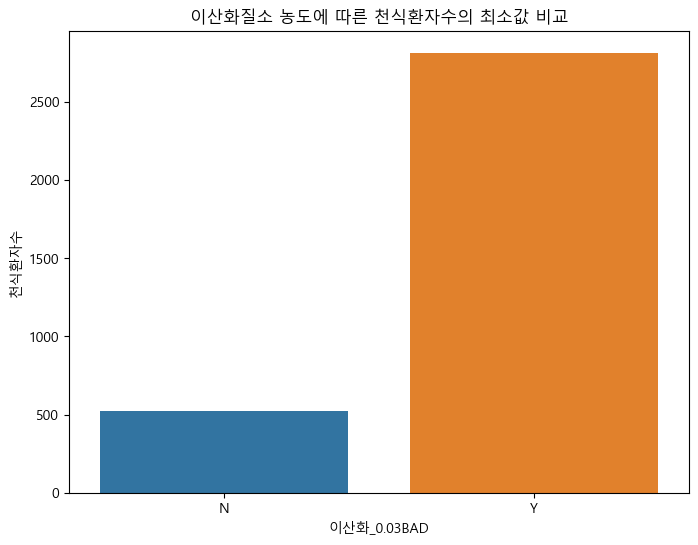

In [85]:

# '이산화_0.03BAD'에 따른 '천식환자수'의 최소값을 계산합니다.
result_df2 = result_df2.groupby('이산화_0.03BAD')['천식환자수'].min().reset_index()

# 최소값을 이용한 막대 그래프를 그립니다.
plt.figure(figsize=(8, 6))
sns.barplot(x='이산화_0.03BAD', y='천식환자수', data=result_df2)

plt.title('이산화질소 농도에 따른 천식환자수의 최소값 비교')
plt.show()

C:\Users\th\AppData\Local\Temp\ipykernel_29964\43758611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sido_result_df['STD_YYYYMM'] = pd.to_datetime(sido_result_df['STD_YYYYMM'], format='%Y%m')


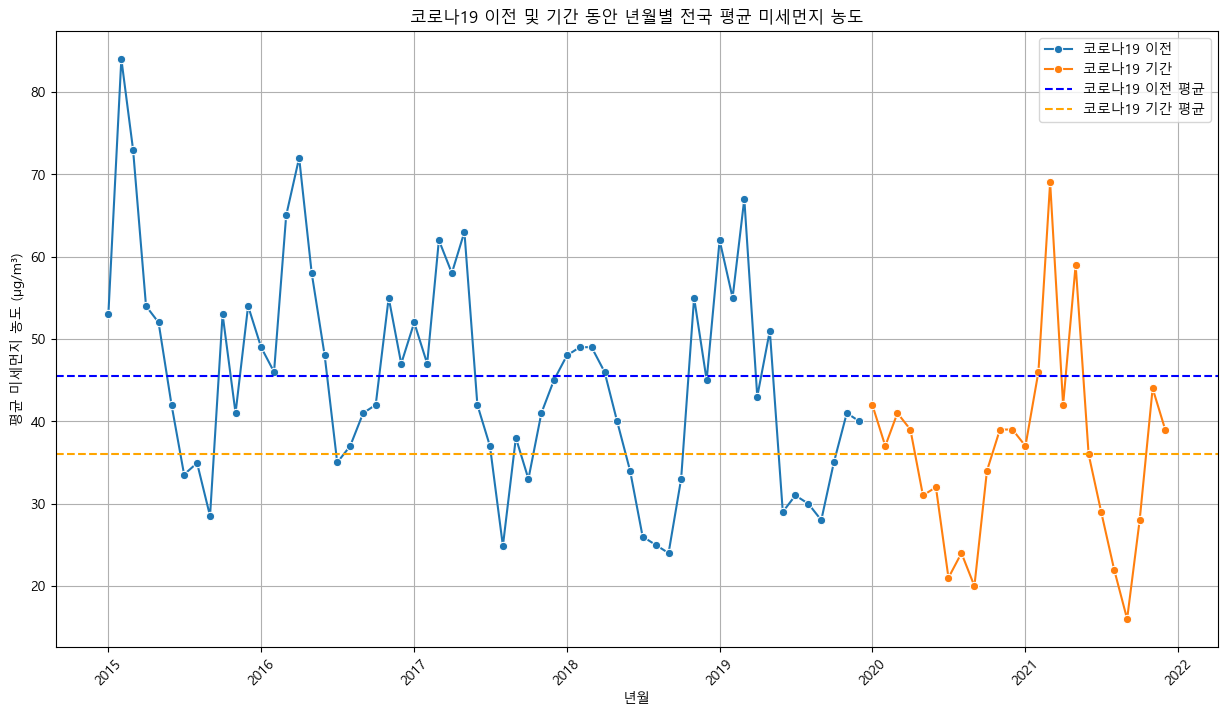

In [90]:
# '서울특별시'에 대한 데이터 필터링
sido_result_df = result_df3[result_df3['SIDO'] == '인천광역시']
# 년월을 datetime 객체로 변환
sido_result_df['STD_YYYYMM'] = pd.to_datetime(sido_result_df['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 계산
sido_result_df_avg = sido_result_df.groupby('STD_YYYYMM')['AVG_PM10'].mean().reset_index()

# 코로나19 이전 기간 설정
pre_covid_start = '2010-01-01'
pre_covid_end = '2019-12-31'

# 코로나19 기간 설정
covid_start = '2020-01-01'
covid_end = '2021-12-31'

# 필터링된 데이터 프레임 생성
sido_result_df_pre_covid = sido_result_df_avg[(sido_result_df_avg['STD_YYYYMM'] >= pre_covid_start) & (sido_result_df_avg['STD_YYYYMM'] <= pre_covid_end)]
sido_result_df_covid = sido_result_df_avg[(sido_result_df_avg['STD_YYYYMM'] >= covid_start) & (sido_result_df_avg['STD_YYYYMM'] <= covid_end)]

# 평균 미세먼지 농도 계산
avg_pre_covid = sido_result_df_pre_covid['AVG_PM10'].mean()
avg_covid = sido_result_df_covid['AVG_PM10'].mean()

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=sido_result_df_pre_covid, marker='o', label='코로나19 이전')
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=sido_result_df_covid, marker='o', label='코로나19 기간')

# 평균선 추가
plt.axhline(avg_pre_covid, color='blue', linestyle='--', label='코로나19 이전 평균')
plt.axhline(avg_covid, color='orange', linestyle='--', label='코로나19 기간 평균')

plt.title('코로나19 이전 및 기간 동안 년월별 전국 평균 미세먼지 농도')
plt.xlabel('년월')
plt.ylabel('평균 미세먼지 농도 (μg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\th\AppData\Local\Temp\ipykernel_29964\695073099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sido_result_df['STD_YYYYMM'] = pd.to_datetime(sido_result_df['STD_YYYYMM'], format='%Y%m')


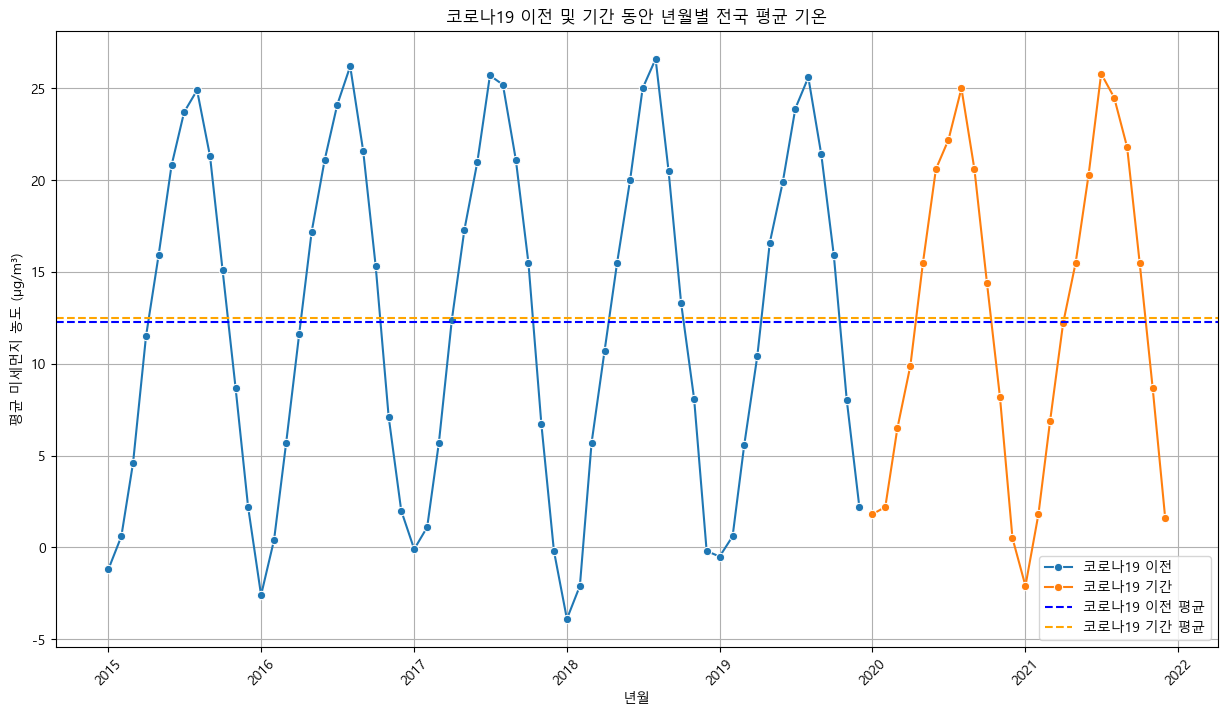

In [92]:
# '서울특별시'에 대한 데이터 필터링
sido_result_df = result_df3[result_df3['SIDO'] == '인천광역시']
# 년월을 datetime 객체로 변환
sido_result_df['STD_YYYYMM'] = pd.to_datetime(sido_result_df['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 계산
sido_result_df_avg = sido_result_df.groupby('STD_YYYYMM')['평균기온'].mean().reset_index()

# 코로나19 이전 기간 설정
pre_covid_start = '2010-01-01'
pre_covid_end = '2019-12-31'

# 코로나19 기간 설정
covid_start = '2020-01-01'
covid_end = '2021-12-31'

# 필터링된 데이터 프레임 생성
sido_result_df_pre_covid = sido_result_df_avg[(sido_result_df_avg['STD_YYYYMM'] >= pre_covid_start) & (sido_result_df_avg['STD_YYYYMM'] <= pre_covid_end)]
sido_result_df_covid = sido_result_df_avg[(sido_result_df_avg['STD_YYYYMM'] >= covid_start) & (sido_result_df_avg['STD_YYYYMM'] <= covid_end)]

# 평균 미세먼지 농도 계산
avg_pre_covid = sido_result_df_pre_covid['평균기온'].mean()
avg_covid = sido_result_df_covid['평균기온'].mean()

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='평균기온', data=sido_result_df_pre_covid, marker='o', label='코로나19 이전')
sns.lineplot(x='STD_YYYYMM', y='평균기온', data=sido_result_df_covid, marker='o', label='코로나19 기간')

# 평균선 추가
plt.axhline(avg_pre_covid, color='blue', linestyle='--', label='코로나19 이전 평균')
plt.axhline(avg_covid, color='orange', linestyle='--', label='코로나19 기간 평균')

plt.title('코로나19 이전 및 기간 동안 년월별 전국 평균 기온')
plt.xlabel('년월')
plt.ylabel('평균 미세먼지 농도 (μg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()